In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipyfilechooser import FileChooser
import netCDF4 as nc
import os
from ipywidgets import TwoByTwoLayout

In [ ]:
fn = 'data/grace_nc/GRD-3_2002094-2002120_GRAC_JPLEM_BA01_0600_LND_v04.nc'
ds = nc.Dataset(fn)

In [ ]:
print(ds)

In [ ]:
lwe = ds['lwe_thickness']
print(lwe)

In [ ]:
lon = ds['lon']

In [ ]:
fig=plt.plot()
plt.axis('off')


In [ ]:

class toolbox(widgets.HBox):
     
    def __init__(self):
        super().__init__()
        output = widgets.Output()
        # create figure
        with output:
            fig=plt.plot()
            plt.axis('off')
        # define widgets
        fileuploader = FileChooser()
        layerselector = widgets.Dropdown()
        plot_button = widgets.Button(description='Plot')


                           
        controls = widgets.VBox([
            fileuploader,
            plot_button
        ])

        app = TwoByTwoLayout(top_left=controls, top_right=output)

        # observe stuff
        fileuploader.observe(self.update, 'value')
         
        # add to children
        self.children = [controls, output]
     
    def update(self, change):
        """Draw line in plot"""
        self.fig.canvas.draw()
 
         

toolbox()

FileChooser(path='C:\Users\utkge\Desktop\geog510\rasterarea\docs\examples', filename='', title='', show_hidden…

Text(value='x-axis', description='X-axis:')

Text(value='y-axis', description='Y-axis:')

Button(description='Plot', style=ButtonStyle())

Button(description='Save', style=ButtonStyle())

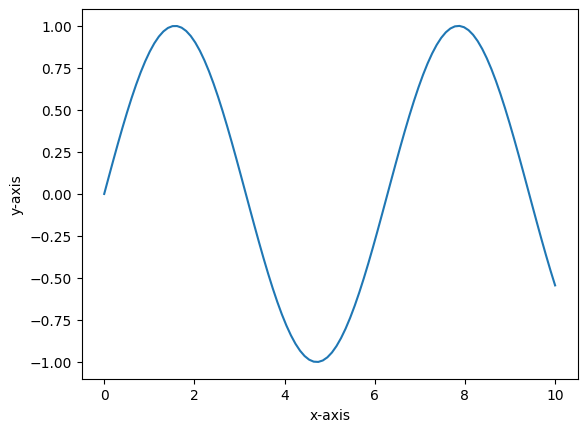

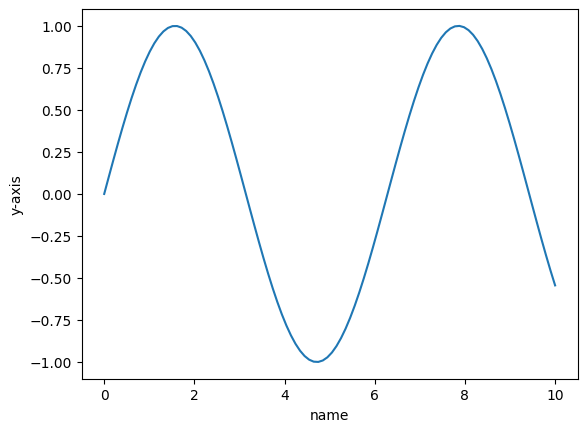

In [55]:
class Toolbar:
    def __init__(self):
        self.x_axis_name = "x-axis"
        self.y_axis_name = "y-axis"
        self.create_widgets()
        self.setup_interactive_plot()

    def create_widgets(self):
        self.fileuploader = FileChooser()
        self.x_axis_input = widgets.Text(value=self.x_axis_name, description="X-axis:")
        self.y_axis_input = widgets.Text(value=self.y_axis_name, description="Y-axis:")
        self.plot_button = widgets.Button(description="Plot")
        self.save_button = widgets.Button(description="Save")
        self.plot_button.on_click(self.plot)
        self.save_button.on_click(self.save)

    def setup_interactive_plot(self):
        display(self.fileuploader,self.x_axis_input, self.y_axis_input, self.plot_button, self.save_button)

    def open_file(self, event=None):
        path = self.fileuploader.value
        if path.endswith(".nc"):
            self.ds = nc.Dataset(path)
        elif path.endswith(".tif")
            self.ds = gdal.Open(path)
        else:
            print("File type not supported")

    def plot(self, event=None):
        plt.figure()
        x = np.linspace(0, 10, 100)
        y = np.sin(x)
        plt.plot(x, y)
        plt.xlabel(self.x_axis_input.value)
        plt.ylabel(self.y_axis_input.value)
        plt.show()

    def save(self, event=None):
        plt.savefig(f"{self.x_axis_input.value}_vs_{self.y_axis_input.value}.png", dpi=600)
        print(f"Plot saved as {self.x_axis_input.value}_vs_{self.y_axis_input.value}.png")


Toolbar()